Dectecção de estresse/anciedade com uso de modelos de previsão e relacionar com o dropout_risk

In [ ]:
# Instalar bibliotecas no Colab
!pip install shap lightgbm seaborn --quiet
# Importações
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, RocCurveDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier


In [ ]:
# Carregar os dados
df = pd.read_csv("enhanced_student_habits_performance_dataset.csv", sep=",")

# Criar variável binária: high_stress (estresse alto se >= 7)
df['high_stress'] = (df['stress_level'] >= 7).astype(int)

# Mapear variáveis ordinais
ord_map = {
    'diet_quality': {'Poor': 1, 'Fair': 2, 'Good': 3}}
for col, mapa in ord_map.items():
    if col in df.columns:
        df[col] = df[col].map(mapa)


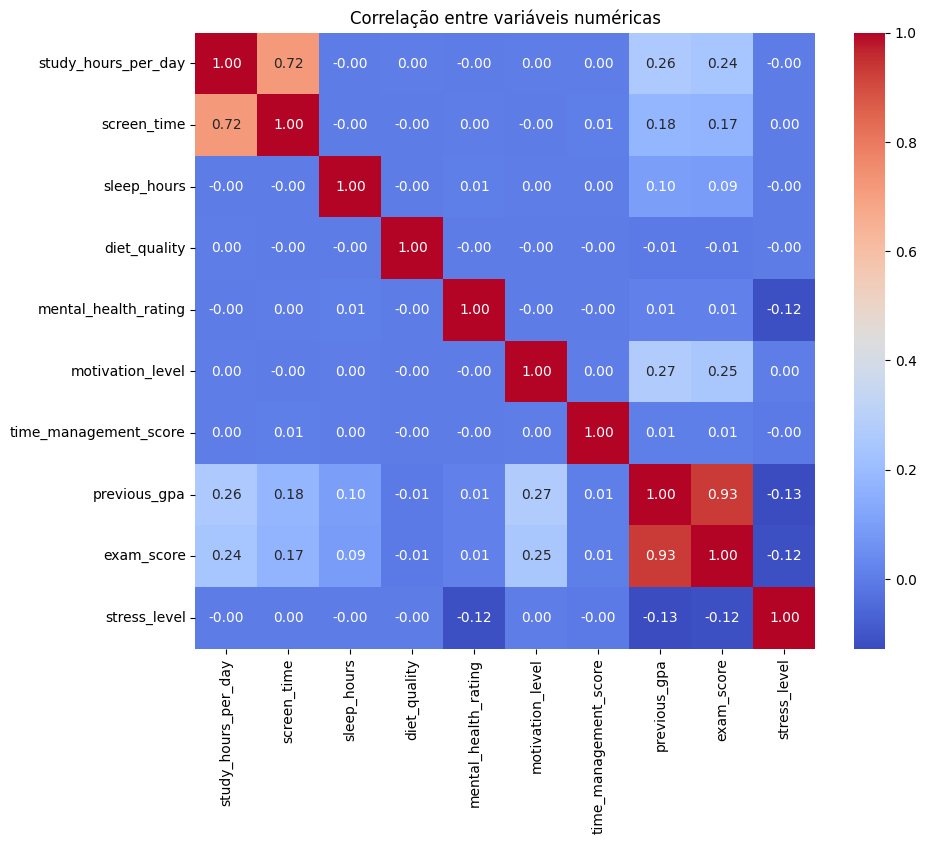

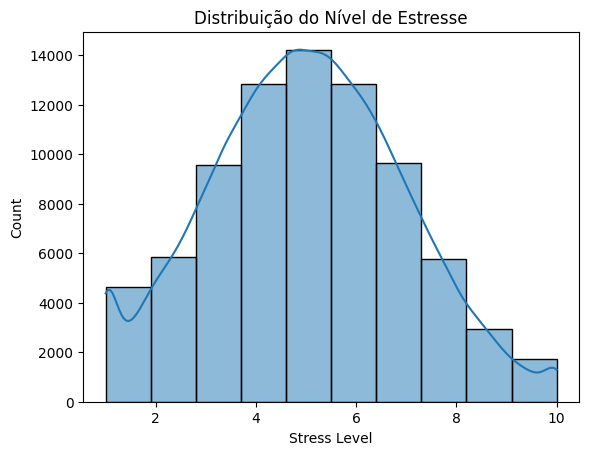

In [ ]:
# Variáveis principais numéricas
num_vars = [
    'study_hours_per_day', 'screen_time', 'sleep_hours',
    'diet_quality', 'mental_health_rating',
    'motivation_level', 'time_management_score',
    'previous_gpa', 'exam_score', 'stress_level'
]

# Matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(df[num_vars].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlação entre variáveis numéricas")
plt.show()

# Distribuição do stress_level
sns.histplot(df['stress_level'], bins=10, kde=True)
plt.title("Distribuição do Nível de Estresse")
plt.xlabel("Stress Level")
plt.show()


/tmp/ipython-input-271490955.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/tmp/ipython-input-271490955.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


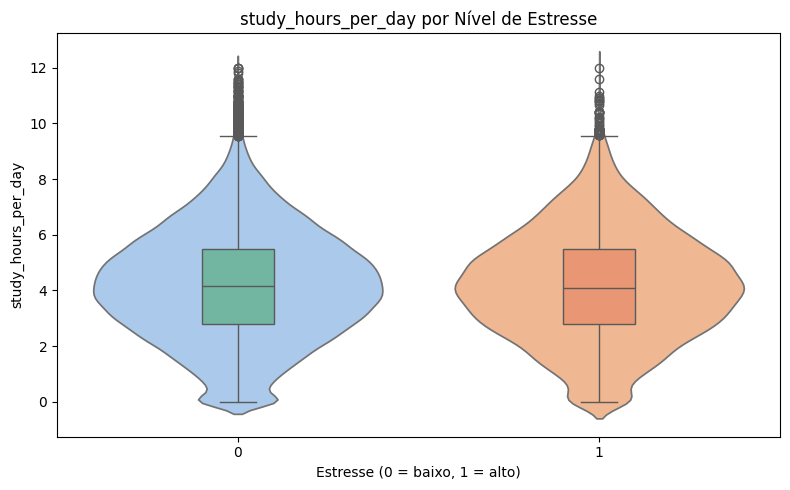

/tmp/ipython-input-271490955.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/tmp/ipython-input-271490955.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


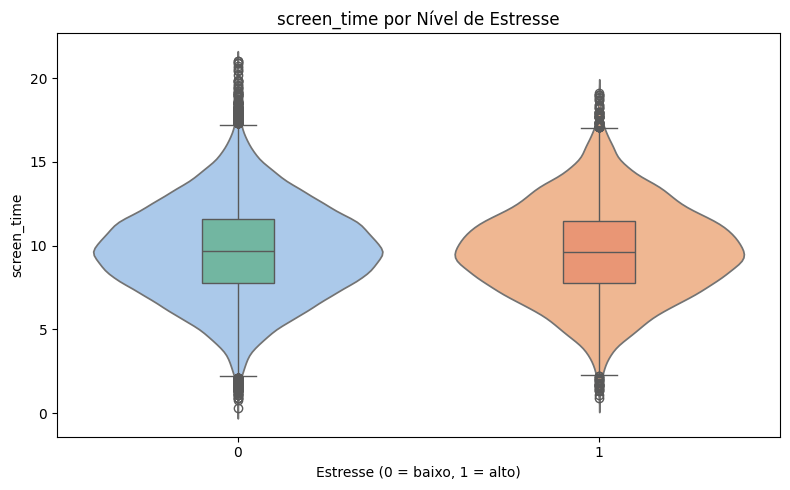

/tmp/ipython-input-271490955.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/tmp/ipython-input-271490955.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


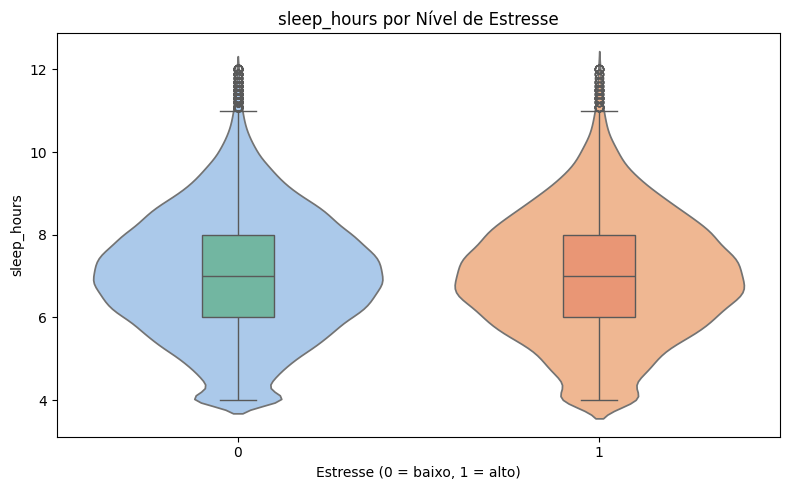

/tmp/ipython-input-271490955.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/tmp/ipython-input-271490955.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


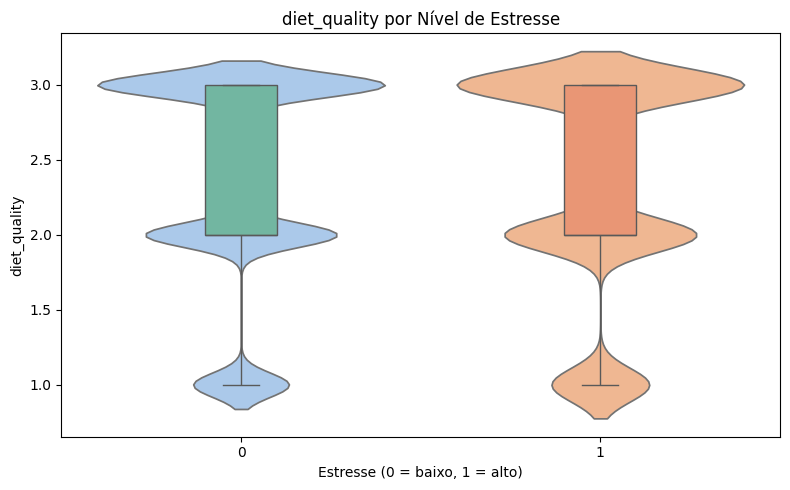

/tmp/ipython-input-271490955.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/tmp/ipython-input-271490955.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


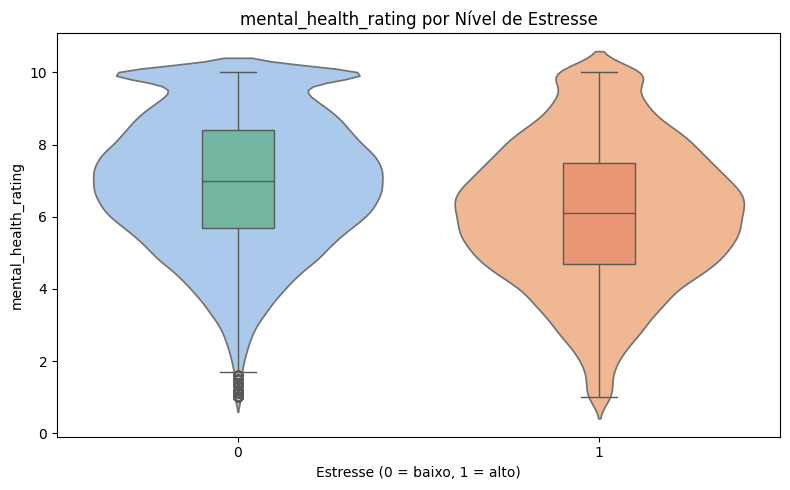

/tmp/ipython-input-271490955.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/tmp/ipython-input-271490955.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


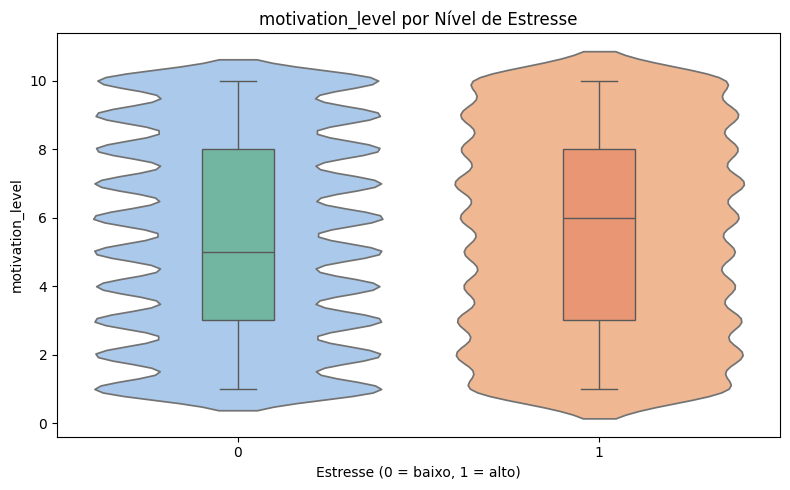

/tmp/ipython-input-271490955.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/tmp/ipython-input-271490955.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


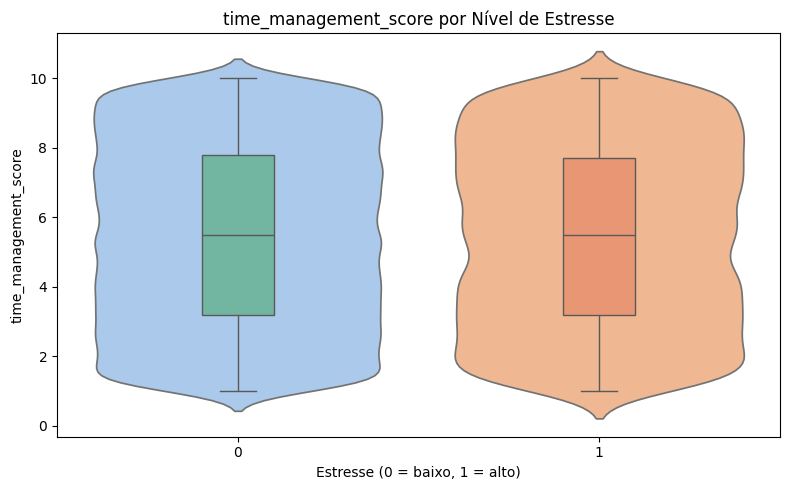

/tmp/ipython-input-271490955.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/tmp/ipython-input-271490955.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


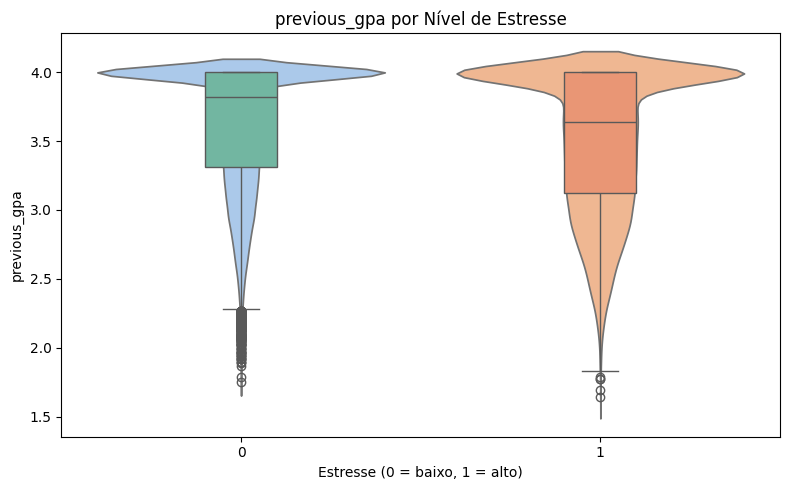

/tmp/ipython-input-271490955.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/tmp/ipython-input-271490955.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


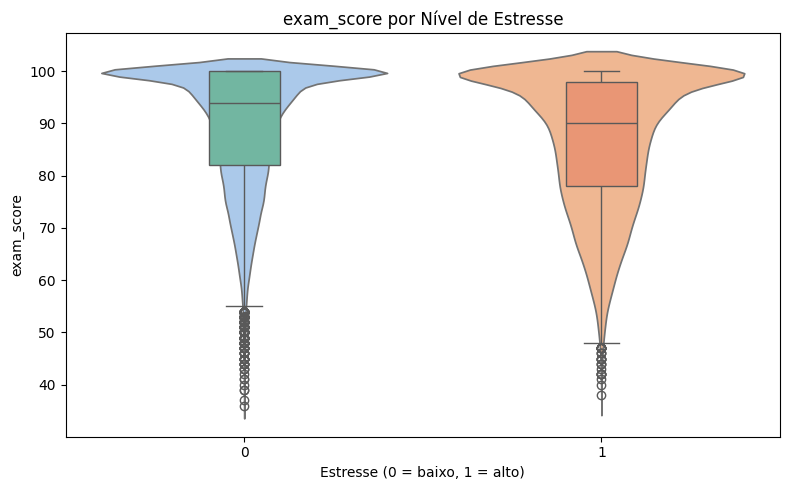

/tmp/ipython-input-271490955.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/tmp/ipython-input-271490955.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


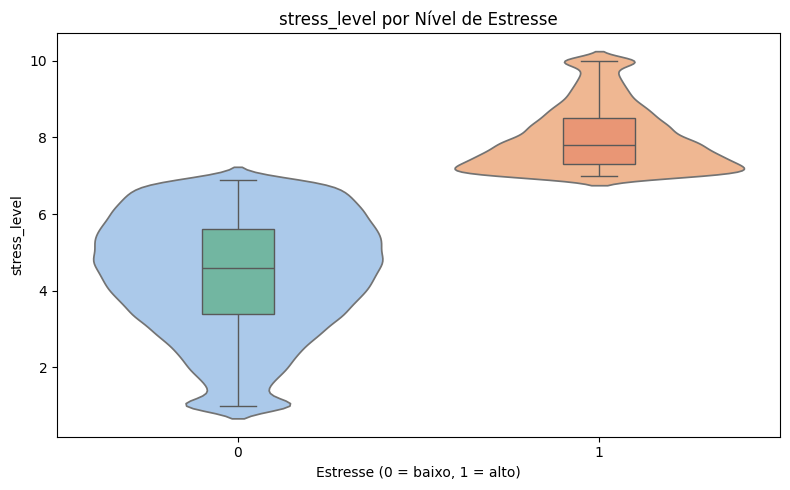

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecionar apenas variáveis numéricas válidas
valid_vars = [col for col in num_vars if col in df.columns and pd.api.types.is_numeric_dtype(df[col])]
df_plot = df[['high_stress'] + valid_vars].dropna()

# Plotar boxplot + violinplot para cada variável numérica
for var in valid_vars:
    plt.figure(figsize=(8, 5))
    sns.violinplot(
        data=df_plot, x='high_stress', y=var, inner=None, palette='pastel'
    )
    sns.boxplot(
        data=df_plot, x='high_stress', y=var, width=0.2, palette='Set2'
    )
    plt.title(f'{var} por Nível de Estresse')
    plt.xlabel("Estresse (0 = baixo, 1 = alto)")
    plt.ylabel(var)
    plt.tight_layout()
    plt.show()


Shape of df_model after dropna(): (80000, 18)
Value counts for target variable 'high_stress':
high_stress
0    66810
1    13190
Name: count, dtype: int64
[LightGBM] [Info] Number of positive: 10552, number of negative: 53448
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002999 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1319
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.164875 -> initscore=-1.622394
[LightGBM] [Info] Start training from score -1.622394
[LightGBM] [Info] Number of positive: 10552, number of negative: 53448
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002743 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wis

,Accuracy,ROC AUC
Naive Bayes,0.822,0.630
Logistic Regression,0.835,0.645
Random Forest,0.835,0.616
LightGBM,0.835,0.640


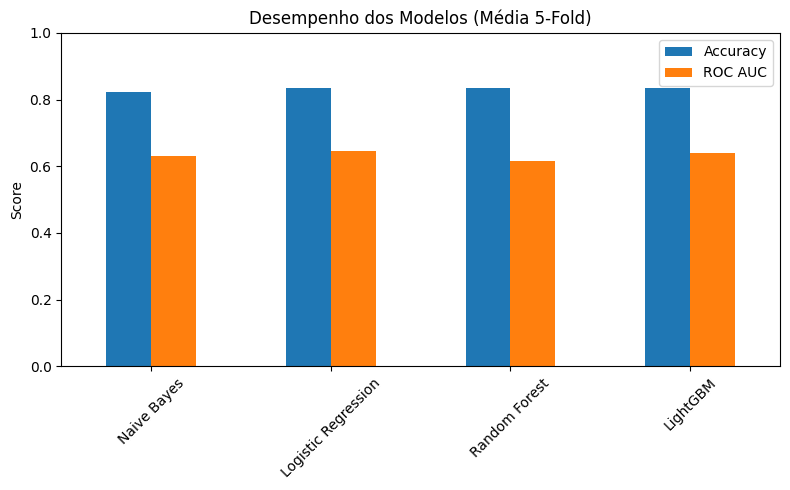

In [ ]:
# Categóricas que precisam de label encoding
for col in ['gender', 'part_time_job', 'access_to_tutoring', 'family_income_range']:
    if df[col].dtype == 'object':
        df[col] = LabelEncoder().fit_transform(df[col])

# Features selecionadas
features = [
    'study_hours_per_day', 'screen_time', 'sleep_hours',
    'exercise_frequency', 'diet_quality', 'mental_health_rating',
    'motivation_level', 'time_management_score',
    'previous_gpa', 'exam_score', 'attendance_percentage',
    'social_media_hours', 'part_time_job', 'gender',
    'access_to_tutoring', 'family_income_range'
]

# Separar X e y
df_model = df[features + ['high_stress', 'dropout_risk']].dropna()
X = df_model[features]
y = df_model['high_stress']

# --- Add a check here to see if df_model is empty ---
print(f"Shape of df_model after dropna(): {df_model.shape}")
if df_model.shape[0] == 0:
    print("Warning: df_model is empty after dropping NaN values. Cannot proceed with cross-validation.")
    # You might want to add a sys.exit() or raise an error here
    # or handle the case where there's no data appropriately.
    # For now, we'll just print a warning.
else:
    print(f"Value counts for target variable 'high_stress':\n{y.value_counts()}")
# Modelos
modelos = {
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "LightGBM": LGBMClassifier(random_state=42)
}

# Validação cruzada e comparação
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = {}

# Only proceed with cross-validation if there is data
if df_model.shape[0] > 0:
    for nome, model in modelos.items():
        result = cross_validate(
            model, X, y, cv=skf,
            scoring=['accuracy', 'roc_auc'],
            return_train_score=False
        )
        scores[nome] = {
            'Accuracy': np.mean(result['test_accuracy']),
            'ROC AUC': np.mean(result['test_roc_auc']),

        }

    # Visualizar resultados
    df_scores = pd.DataFrame(scores).T.round(3)
    display(df_scores)

    # Gráfico
    df_scores.plot(kind='bar', figsize=(8, 5), title="Desempenho dos Modelos (Média 5-Fold)")
    plt.ylabel("Score")
    plt.xticks(rotation=45)
    plt.ylim(0, 1)

    plt.tight_layout()
    plt.show()
else:
    print("Skipping model training and evaluation due to no data after dropping NaN values.")

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


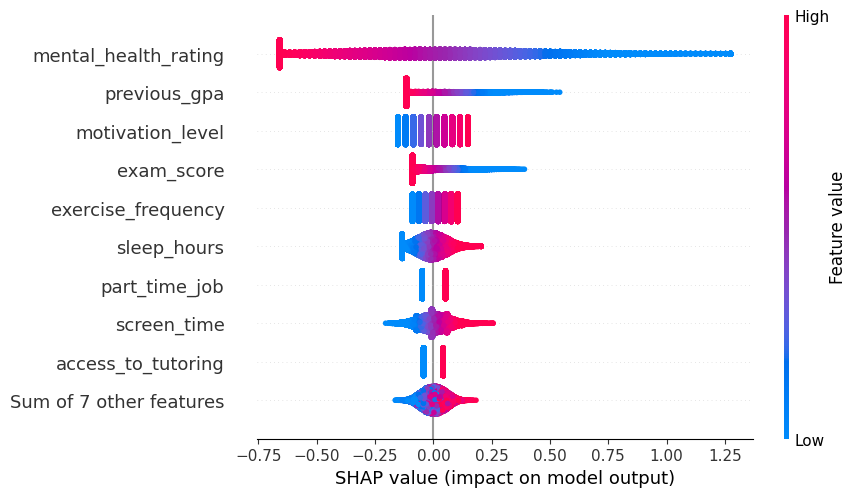

In [ ]:
modelo_final = LogisticRegression(random_state=42)
modelo_final.fit(X, y)

explainer = shap.Explainer(modelo_final, X)
shap_values = explainer(X)

# SHAP summary plot
shap.plots.beeswarm(shap_values)


Distribuição de risco de evasão por nível de estresse:


Risco de Evasão,Não,Sim
Baixo Estresse,100.000000,0.000000
Alto Estresse,88.006065,11.993935


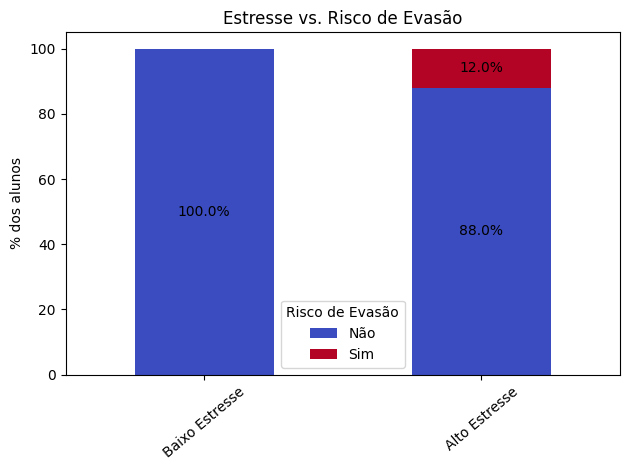

In [ ]:
# Frequência cruzada
cross_tab = pd.crosstab(df_model['high_stress'], df_model['dropout_risk'], normalize='index') * 100
cross_tab.columns = ['Não', 'Sim'] # Map 'No' to 'Não' and 'Yes' to 'Sim'
cross_tab.columns.name = 'Risco de Evasão'
cross_tab.index = ['Baixo Estresse', 'Alto Estresse']
print("Distribuição de risco de evasão por nível de estresse:")
display(cross_tab)

# Gráfico
ax = cross_tab.plot(kind='bar', stacked=True, colormap='coolwarm', title="Estresse vs. Risco de Evasão")
plt.ylabel('% dos alunos')
plt.xticks(rotation=40)

# Adicionar percentuais no gráfico
for c in ax.containers:
    labels = [f'{w:.1f}%' if (w := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center')

plt.tight_layout()
plt.show()